In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
instacart = pd.read_csv("instacart_orders (1).csv", sep=";")
products = pd.read_csv("products (1).csv", sep=";")
order_products = pd.read_csv("order_products (1).csv", sep=";")
aisles = pd.read_csv("aisles (1).csv", sep=";")
departments = pd.read_csv("departments (1).csv", sep=";")

## Find and remove duplicate values 

### `orders` data frame

In [91]:
# Check for duplicated orders
print(instacart.duplicated().sum())

15


In [92]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_2am_orders = instacart[(instacart['order_dow'] == 3) & (instacart['order_hour_of_day'] == 2)]
wednesday_2am_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [93]:
# Remove duplicate orders-
order_duplicate = instacart.drop_duplicates(inplace=True)
order_duplicate

In [94]:
# Double check for duplicate rows
instacart.duplicated().sum()

0

In [95]:
# Double check for duplicate order IDs only
duplicate_order_ids = instacart[instacart.duplicated(subset=['order_id'], keep=False)]
duplicate_order_ids

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


### `products` data frame

In [96]:
products.duplicated().sum()
# Check for fully duplicate rows

0

In [97]:
# Check for just duplicate product IDs
duplicate_product_id = products[products.duplicated(subset=['product_id'], keep=False)]
duplicate_product_id


,product_id,product_name,aisle_id,department_id


In [98]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()
duplicate_product_names = products[products.duplicated(subset=['product_name'], keep=False)]
duplicate_product_names

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
41,42,biotin 1000 mcg,47,11
71,72,NaN,100,21
109,110,NaN,100,21
185,186,fresh scent dishwasher detergent with dawn,74,17
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [99]:
# Check for duplicate product names that aren't missing
products = pd.read_csv("products (1).csv", sep=";")
non_null_duplicates = products['product_name'].duplicated(keep=False) & products['product_name'].notnull()
number_of_duplicates = non_null_duplicates.sum()
"Number of duplicate product names:", number_of_duplicates

('Number of duplicate product names:', 0)

### `departments` data frame

In [100]:
duplicate_department_ids = departments[departments['department_id'].duplicated(keep=False)]
duplicate_department_ids

,department_id,department


In [101]:
departments.duplicated().sum()

0

### `aisles` data frame

In [102]:
duplicate_aisles = aisles[aisles.duplicated(subset=['aisle_id'], keep=False)]
print(duplicate_aisles)

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [103]:
aisles.duplicated().sum()

0

### `order_products` data frame

In [104]:
# Check for fullly duplicate rows
duplicate_order_products = order_products[order_products.duplicated(subset=['order_id', 'product_id'], keep=False)]
duplicate_order_products

,order_id,product_id,add_to_cart_order,reordered


In [105]:
# Double check for any other tricky duplicates
order_products = order_products.drop_duplicates(subset=['order_id', 'product_id'], keep='first')

## Find and remove missing values


### `products` data frame

In [106]:
missing_values = products.isnull().sum()
missing_values

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [107]:
# Are all of the missing product names associated with aisle ID 100?
missing_product_names_aisle_100 = products['product_name'].isnull() & (products['aisle_id'] == 100)
(f"Missing names in aisle 100: {missing_product_names_aisle_100.sum()}")

'Missing names in aisle 100: 1258'

In [108]:
# Are all of the missing product names associated with department ID 21?
missing_names_department_21 = products['product_name'].isnull() & (products['department_id'] == 100)
(f"Missing names in department 21: {missing_names_department_21.sum()}")

'Missing names in department 21: 0'

In [109]:
# What is this ailse and department?
a_d = products.loc[products['department_id']== '21', ['aisle_id', 'department_id']]
a_d

,aisle_id,department_id


In [110]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown', inplace=True)
products

/var/folders/_r/1nc7pxjs75zckjdg2x4twp1h0000gn/T/ipykernel_20729/2726891051.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_name'] = products['product_name'].fillna('Unknown', inplace=True)


,product_id,product_name,aisle_id,department_id
0,1,None,61,19
1,2,None,104,13
2,3,None,94,7
3,4,None,38,1
4,5,None,5,13
...,...,...,...,...
49689,49690,None,64,7
49690,49691,None,130,14
49691,49692,None,130,14
49692,49693,None,127,11


### `orders` data frame

In [111]:
missing_values = instacart.isnull().sum()
missing_values

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [112]:
# Are there any missing values where it's not a customer's first order?

is_not_first_order = instacart['order_number'] != 1
is_days_since_prior_missing = instacart['days_since_prior_order'].isnull()
missing_not_first_orders = instacart[is_not_first_order & is_days_since_prior_missing]
num_missing_not_first_orders = len(missing_not_first_orders)
print(f"Number of NOT first orders with missing 'days_since_prior_order': {num_missing_not_first_orders}")
if num_missing_not_first_orders == 0:
    instacart['days_since_prior_order'].fillna(0, inplace=True)


Number of NOT first orders with missing 'days_since_prior_order': 0


/var/folders/_r/1nc7pxjs75zckjdg2x4twp1h0000gn/T/ipykernel_20729/2477658080.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  instacart['days_since_prior_order'].fillna(0, inplace=True)


### `order_products` data frame

In [113]:
missing_values = order_products.isnull().sum()
missing_values

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [114]:
# What are the min and max values in this column?
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()
print(f"Minimum value in 'add_to_cart_order': {min_value}")
print(f"Maximum value in 'add_to_cart_order': {max_value}")

Minimum value in 'add_to_cart_order': 1.0
Maximum value in 'add_to_cart_order': 64.0


In [115]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_values = order_products[order_products['add_to_cart_order'].isna()]
order_ids_cart_missing = missing_values['order_id'].unique()
order_ids_cart_missing

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [116]:
# Do all orders with missing values have more than 64 products?

mask = order_products["order_id"].isin(order_ids_cart_missing)
orders_with_missing_values = order_products[mask]
order_product_counts = orders_with_missing_values.groupby("order_id")["product_id"].count()
all_orders_have_more_than_64_products = all(order_product_counts > 64)
print("All orders with missing values have more than 64 products:", all_orders_have_more_than_64_products)



All orders with missing values have more than 64 products: True


In [117]:
# Replace missing values with 999 and convert column to integer type

order_products = pd.read_csv('order_products (1).csv', sep=';')

order_products['add_to_cart_order'].fillna(999, inplace=True)

order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

order_products.head()


/var/folders/_r/1nc7pxjs75zckjdg2x4twp1h0000gn/T/ipykernel_20729/923619135.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_products['add_to_cart_order'].fillna(999, inplace=True)


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [118]:
instacart['order_hour_of_day'].unique()
print("Hour of day - min:", instacart['order_hour_of_day'].min(), "max:", instacart['order_hour_of_day'].max())
print("Day of week - min:", instacart['order_dow'].min(), "max:", instacart['order_dow'].max())

Hour of day - min: 0 max: 23
Day of week - min: 0 max: 6


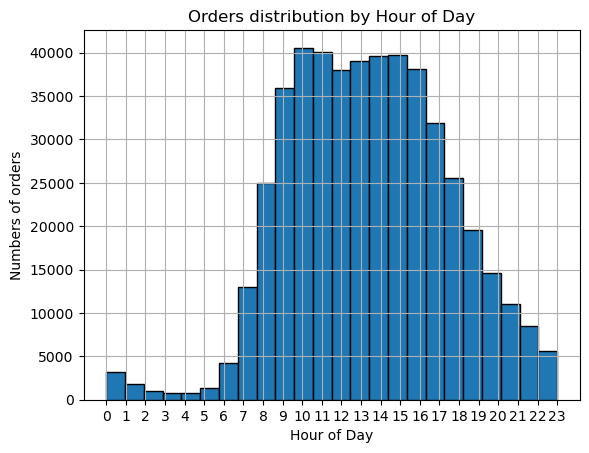

In [119]:
instacart['order_hour_of_day'].hist(bins=24, edgecolor='black')  
plt.title('Orders distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Numbers of orders')
plt.xticks(range(0, 24))  
plt.show()

### [A2] What time of day do people shop for groceries?

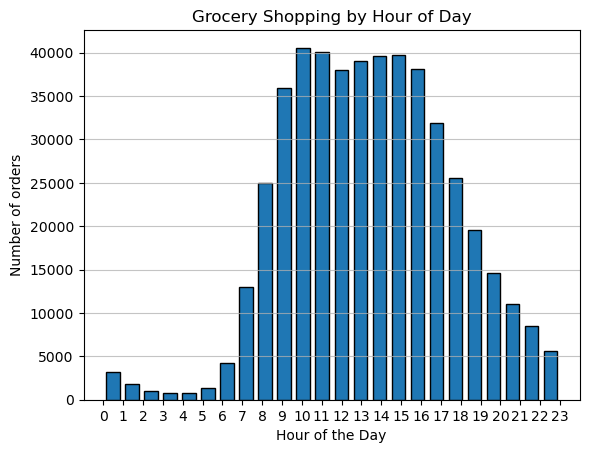

In [120]:
plt.hist(instacart['order_hour_of_day'], bins=24, edgecolor='black', rwidth=0.7)
plt.title('Grocery Shopping by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of orders')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.75)
plt.show()

### [A3] What day of the week do people shop for groceries?

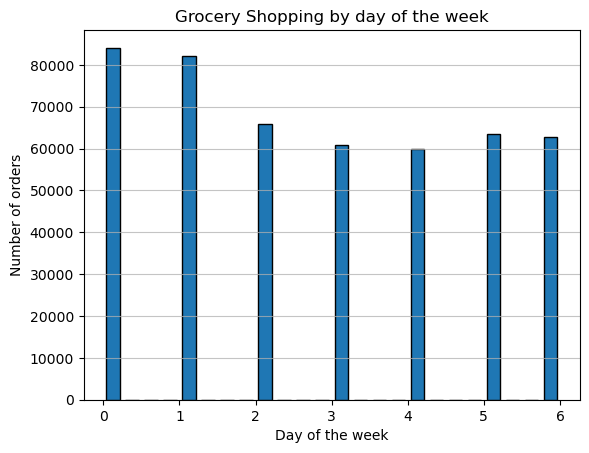

In [121]:
plt.hist(instacart['order_dow'], bins=24, edgecolor='black', rwidth=0.7)
plt.title('Grocery Shopping by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of orders')
plt.xticks(range(0, 7))
plt.grid(axis='y', alpha=0.75)
plt.show()

### [A4] How long do people wait until placing another order?

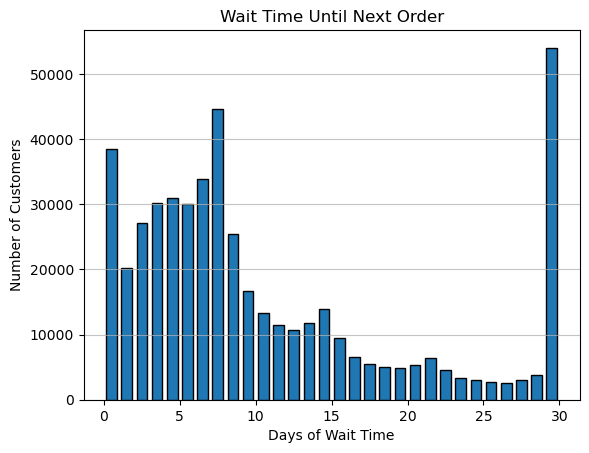

In [122]:
plt.hist(instacart['days_since_prior_order'].dropna(), bins=30, edgecolor='black', rwidth=0.7)
plt.title('Wait Time Until Next Order')
plt.xlabel('Days of Wait Time')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [123]:
mean_wait = instacart['days_since_prior_order'].mean()
median_wait = instacart['days_since_prior_order'].median()
mode_wait = instacart['days_since_prior_order'].mode()[0] 

print(f"Mean wait time: {mean_wait:.2f} days") 
print(f"Median wait time: {median_wait} days")
print(f"Most common wait time (Mode): {mode_wait} days")

Mean wait time: 10.43 days
Median wait time: 7.0 days
Most common wait time (Mode): 30.0 days


### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [124]:
instacart = pd.read_csv("instacart_orders (1).csv", sep=";")
filtered_df = instacart[instacart['order_dow'].isin([3, 6])]


In [125]:
wednesday_orders = instacart[instacart['order_dow'] == 3]
saturday_orders = instacart[instacart['order_dow'] == 6]

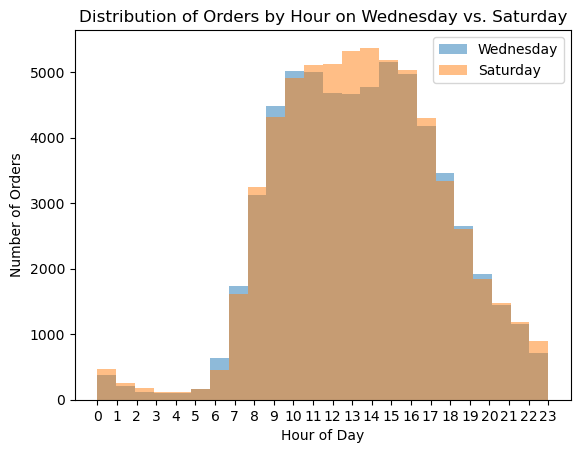

In [126]:
plt.hist(wednesday_orders['order_hour_of_day'], bins=24, alpha=0.5, label='Wednesday')
plt.hist(saturday_orders['order_hour_of_day'], bins=24, alpha=0.5, label='Saturday')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour on Wednesday vs. Saturday')
plt.xticks(range(0, 24))
plt.legend()

plt.show()

### [B2] What's the distribution for the number of orders per customer?

In [127]:
order_counts = instacart.groupby('user_id')['order_id'].nunique()

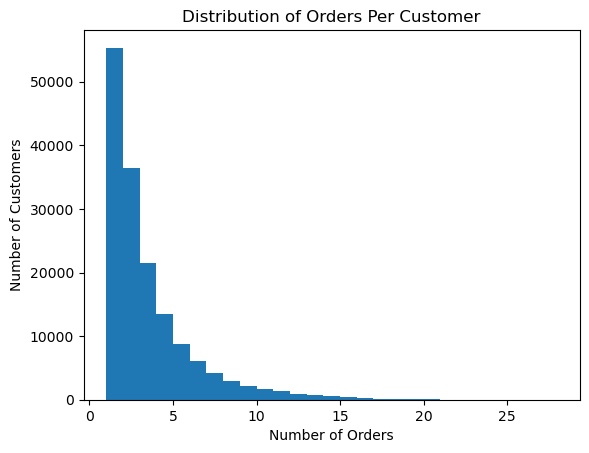

In [128]:
order_counts.hist(bins=range(1, order_counts.max() + 1), grid=False)
plt.title('Distribution of Orders Per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

### [B3] What are the top 20 popular products (display their id and name)?

In [129]:
order_products = pd.read_csv("order_products (1).csv", sep=";")
products = pd.read_csv("products (1).csv", sep=";")

In [130]:
product_order_counts = order_products.groupby('product_id').size().reset_index(name='order_count')
popular_products = product_order_counts.merge(products, on='product_id')
top20_products = popular_products.sort_values(by='order_count', ascending=False).head(20)
top20_products

,product_id,order_count,product_name,aisle_id,department_id
22808,24852,66050,Banana,24,4
12025,13176,53297,Bag of Organic Bananas,24,4
19370,21137,37039,Organic Strawberries,24,4
20077,21903,33971,Organic Baby Spinach,123,4
43271,47209,29773,Organic Hass Avocado,24,4
43788,47766,24689,Organic Avocado,24,4
43663,47626,21495,Large Lemon,24,4
15364,16797,20018,Strawberries,24,4
24047,26209,19690,Limes,24,4
25556,27845,19600,Organic Whole Milk,84,16


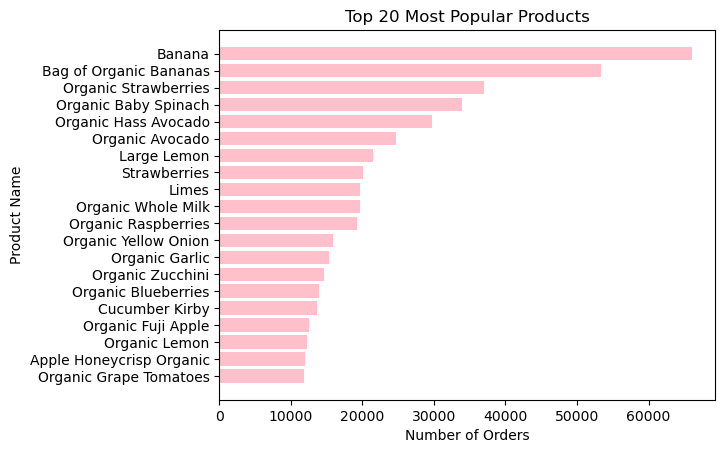

In [131]:
plt.barh(top20_products['product_name'], top20_products['order_count'], color='pink')  
plt.xlabel('Number of Orders') 
plt.ylabel('Product Name')  
plt.title('Top 20 Most Popular Products')  
plt.gca().invert_yaxis()  
plt.show() 


### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [132]:
items_per_order = order_products.groupby('order_id')['product_id'].count()

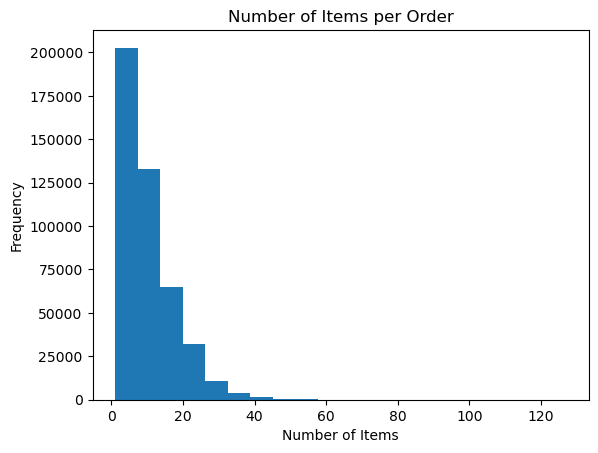

In [133]:
items_per_order.plot(kind="hist", bins=20, title='Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

In [134]:
average_items = items_per_order.mean()
print("The average number of items per order is:", average_items)

The average number of items per order is: 10.098983215049127


### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [135]:
order_products = pd.read_csv("order_products (1).csv", sep=";")
products = pd.read_csv("products (1).csv", sep=";")

In [136]:
reorder_counts = order_products[order_products['reordered'] == 1].groupby('product_id').size().reset_index(name='reorder_count')
reorder_counts = reorder_counts.merge(products, on='product_id')
top20_reorders = reorder_counts.sort_values(by='reorder_count', ascending=False).head(20)
top20_reorders

,product_id,reorder_count,product_name,aisle_id,department_id
18104,24852,55763,Banana,24,4
9528,13176,44450,Bag of Organic Bananas,24,4
15368,21137,28639,Organic Strawberries,24,4
15936,21903,26233,Organic Baby Spinach,123,4
34407,47209,23629,Organic Hass Avocado,24,4
34828,47766,18743,Organic Avocado,24,4
20285,27845,16251,Organic Whole Milk,84,16
34725,47626,15044,Large Lemon,24,4
20375,27966,14748,Organic Raspberries,123,4
12193,16797,13945,Strawberries,24,4
